Introduction of classmarks:
    
The dataset represents the performance or score data of multiple individuals across various questions or modules in a test or survey. Each row corresponds to a unique individual, and the columns represent the scores for different questions or modules. The "Total" column indicates the total score obtained by the individual, while the remaining columns (Q1aM4, Q1bM6, Q2aM6, etc.) represent scores for specific questions or modules, with the labels suggesting the question number and possible marks assigned (e.g., Q1aM4 might represent Question 1 part (a) with a maximum of 4 marks). Some values are missing (represented as NaN), indicating that the participant may have skipped the question or the data was not recorded. The dataset appears to be organized systematically, with consistent patterns in the structure of question labels and scoring. This type of data could be useful for analyzing individual and overall performance, identifying trends, and drawing insights into the strengths and weaknesses of the participants.

In [30]:
import pandas as pd
a=pd.read_csv("class_marks.csv")
a

,Total,Q1aM4,Q1bM6,Q2aM6,Q2bM4,Q3aM5,Q3bM5,Q4aM3,Q4bM7,Q5M10,Q6aM4,Q6bM6
0,37,4.0,5.0,6.0,4.0,2.0,1.0,NaN,5.0,8.0,4.0,6.0
1,32,4.0,3.0,4.0,3.0,NaN,NaN,3.0,6.0,9.0,NaN,NaN
2,33,4.0,5.0,5.0,1.0,5.0,5.0,NaN,NaN,8.0,NaN,NaN
3,24,4.0,6.0,6.0,3.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN
4,36,3.0,6.0,4.0,4.0,5.0,4.0,NaN,NaN,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
81,32,3.0,6.0,3.0,4.0,5.0,3.0,NaN,NaN,NaN,4.0,6.0
82,27,2.0,2.0,5.0,3.0,NaN,NaN,NaN,NaN,7.0,3.0,5.0
83,37,4.0,6.0,6.0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,6.0
84,28,4.0,NaN,5.0,4.0,5.0,4.0,NaN,NaN,6.0,NaN,NaN


This is the classmarks dataset of students

In [31]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   86 non-null     int64  
 1   Q1aM4   85 non-null     float64
 2   Q1bM6   73 non-null     float64
 3   Q2aM6   72 non-null     float64
 4   Q2bM4   75 non-null     float64
 5   Q3aM5   52 non-null     float64
 6   Q3bM5   51 non-null     float64
 7   Q4aM3   32 non-null     float64
 8   Q4bM7   26 non-null     float64
 9   Q5M10   56 non-null     float64
 10  Q6aM4   33 non-null     float64
 11  Q6bM6   28 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 8.2 KB


This is the info of the dataset

In [32]:
a.fillna(0, inplace=True)
a["Q1"] = a["Q1aM4"] + a["Q1bM6"]
a["Q2"] = a["Q2aM6"] + a["Q2bM4"]
a["Q3"] = a["Q3aM5"] + a["Q3bM5"]
a["Q4"] = a["Q4aM3"] + a["Q4bM7"] 
a["Q5"] = a["Q5M10"]
a["Q6"] = a["Q6aM4"] + a["Q6bM6"]
a["AC"] = a["Q1"] + a["Q2"] + a["Q3"] + a["Q4"] + a["Q5"] + a["Q6"]
a["d"] = a["AC"] - a["Total"]
count = a.loc[a["d"] > 0, "d"].count()
print(count)

22


This is used to calculate the students who are attempting the extra questions

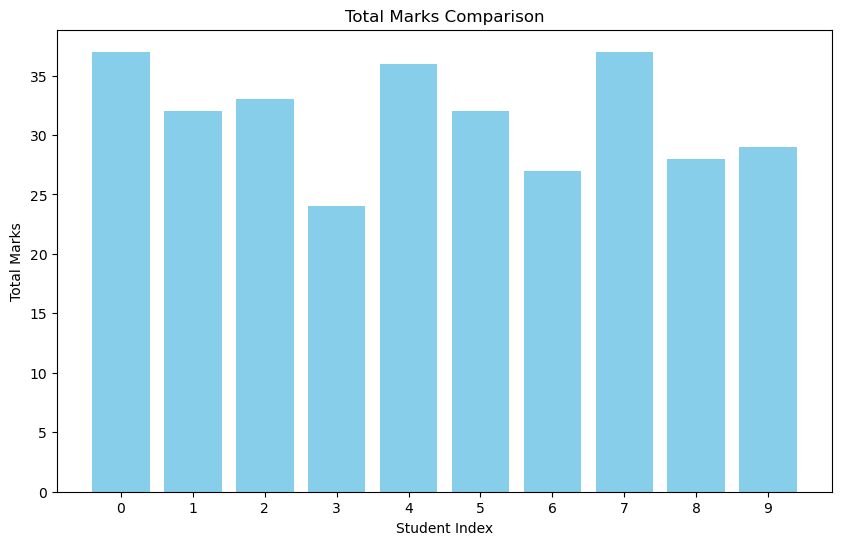

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    "Total": [37, 32, 33, 24, 36, 32, 27, 37, 28, 29],
    "Q1aM4": [4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 2.0, 4.0, 4.0, 4.0],
    "Q1bM6": [5.0, 3.0, 5.0, 6.0, 6.0, 6.0, 2.0, 6.0, None, 6.0],
 
}
a = pd.DataFrame(data)
plt.figure(figsize=(10,6))
plt.bar(a.index, a['Total'], color='skyblue')
plt.title('Total Marks Comparison')
plt.xlabel('Student Index')
plt.ylabel('Total Marks')
plt.xticks(a.index)
plt.show()


This bar graph plot will allow  to see which student performed best overall.

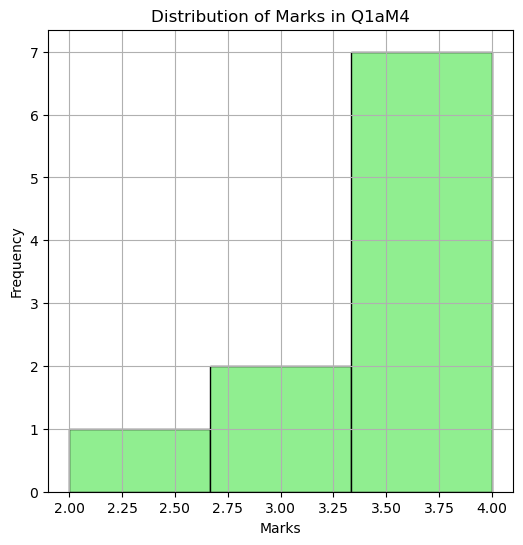

In [34]:

plt.figure(figsize=(6,6))
plt.hist(a['Q1aM4'].dropna(), bins=3, color='lightgreen', edgecolor='black')
plt.title('Distribution of Marks in Q1aM4')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram will show how marks are distributed for the first question
(Q1aM4). It helps identify if the marks are evenly spread out or clustered
around certain values.

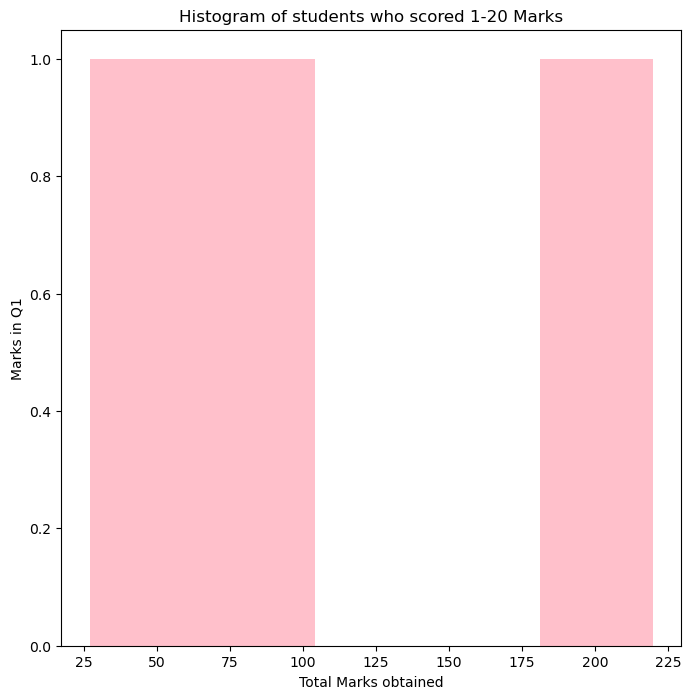

In [35]:
import matplotlib.pyplot as plt
df=pd.DataFrame(a)
a=df.groupby('Q1aM4')['Total'].sum()
a.hist(color = 'pink',figsize=[8,8],grid=False,bins=5)
plt.title("Histogram of students who scored 1-20 Marks")
plt.xlabel("Total Marks obtained")
plt.ylabel("Marks in Q1")
plt.show()

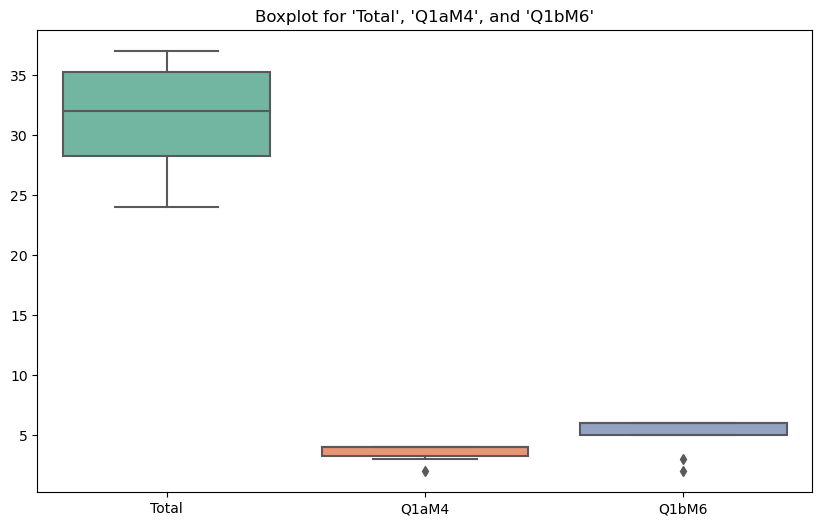

In [36]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Total', 'Q1aM4', 'Q1bM6']], palette="Set2")
plt.title("Boxplot for 'Total', 'Q1aM4', and 'Q1bM6'")
plt.show()

sns.boxplot(): This function is used to create boxplots for the specified columns. It visually shows the distribution of the data and identifies potential outliers.
data=df[['Total', 'Q1aM4', 'Q1bM6']]: This selects the columns for which the boxplot will be created.

Most of the students scored 1 mark and maximum markis 2, implying that all 
the students in this range secured very less marks in Q1

In [37]:
import pandas as pd
a=pd.read_csv("class_marks.csv")
a

,Total,Q1aM4,Q1bM6,Q2aM6,Q2bM4,Q3aM5,Q3bM5,Q4aM3,Q4bM7,Q5M10,Q6aM4,Q6bM6
0,37,4.0,5.0,6.0,4.0,2.0,1.0,NaN,5.0,8.0,4.0,6.0
1,32,4.0,3.0,4.0,3.0,NaN,NaN,3.0,6.0,9.0,NaN,NaN
2,33,4.0,5.0,5.0,1.0,5.0,5.0,NaN,NaN,8.0,NaN,NaN
3,24,4.0,6.0,6.0,3.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN
4,36,3.0,6.0,4.0,4.0,5.0,4.0,NaN,NaN,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
81,32,3.0,6.0,3.0,4.0,5.0,3.0,NaN,NaN,NaN,4.0,6.0
82,27,2.0,2.0,5.0,3.0,NaN,NaN,NaN,NaN,7.0,3.0,5.0
83,37,4.0,6.0,6.0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,6.0
84,28,4.0,NaN,5.0,4.0,5.0,4.0,NaN,NaN,6.0,NaN,NaN


student classmarks 

In [38]:
a.loc[20:25]


,Total,Q1aM4,Q1bM6,Q2aM6,Q2bM4,Q3aM5,Q3bM5,Q4aM3,Q4bM7,Q5M10,Q6aM4,Q6bM6
20,29,2.0,6.0,2.0,2.0,5.0,5.0,NaN,NaN,7.0,NaN,NaN
21,34,4.0,6.0,5.0,3.0,5.0,5.0,NaN,3.0,NaN,4.0,NaN
22,14,4.0,4.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,9,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
24,33,1.0,6.0,6.0,3.0,5.0,5.0,3.0,3.0,7.0,3.0,NaN
25,22,4.0,2.0,5.0,2.0,4.0,3.0,2.0,NaN,NaN,NaN,NaN


This code is used to get the marks of student location from 20 to 25

In [39]:
 a.dtypes

Total      int64
Q1aM4    float64
Q1bM6    float64
Q2aM6    float64
Q2bM4    float64
Q3aM5    float64
Q3bM5    float64
Q4aM3    float64
Q4bM7    float64
Q5M10    float64
Q6aM4    float64
Q6bM6    float64
dtype: object

this code used to get the datatype of question marks

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

a = pd.read_csv("class_marks.csv")
a.fillna(0, inplace=True)

a["Q1"] = a["Q1aM4"] + a["Q1bM6"]
a["Q2"] = a["Q2aM6"] + a["Q2bM4"]
a["Q3"] = a["Q3aM5"] + a["Q3bM5"]
a["Q4"] = a["Q4aM3"] + a["Q4bM7"]
a["Q5"] = a["Q5M10"]
a["Q6"] = a["Q6aM4"] + a["Q6bM6"]
a["TOTAL"] = a["Q1"] + a["Q2"] + a["Q3"] + a["Q5"] + a["Q6"]

columns_to_drop = [
    "Q1aM4", "Q1bM6", "Q2aM6", "Q2bM4",
    "Q3aM5", "Q3bM5", "Q4aM3", "Q4bM7",
    "Q5M10", "Q6aM4", "Q6bM6"
]
a.drop(columns=columns_to_drop)
a

,Total,Q1aM4,Q1bM6,Q2aM6,Q2bM4,Q3aM5,Q3bM5,Q4aM3,Q4bM7,Q5M10,Q6aM4,Q6bM6,Q1,Q2,Q3,Q4,Q5,Q6,TOTAL
0,37,4.0,5.0,6.0,4.0,2.0,1.0,0.0,5.0,8.0,4.0,6.0,9.0,10.0,3.0,5.0,8.0,10.0,40.0
1,32,4.0,3.0,4.0,3.0,0.0,0.0,3.0,6.0,9.0,0.0,0.0,7.0,7.0,0.0,9.0,9.0,0.0,23.0
2,33,4.0,5.0,5.0,1.0,5.0,5.0,0.0,0.0,8.0,0.0,0.0,9.0,6.0,10.0,0.0,8.0,0.0,33.0
3,24,4.0,6.0,6.0,3.0,2.0,2.0,0.0,0.0,0.0,2.0,0.0,10.0,9.0,4.0,0.0,0.0,2.0,25.0
4,36,3.0,6.0,4.0,4.0,5.0,4.0,0.0,0.0,10.0,0.0,0.0,9.0,8.0,9.0,0.0,10.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,32,3.0,6.0,3.0,4.0,5.0,3.0,0.0,0.0,0.0,4.0,6.0,9.0,7.0,8.0,0.0,0.0,10.0,34.0
82,27,2.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0,7.0,3.0,5.0,4.0,8.0,0.0,0.0,7.0,8.0,27.0
83,37,4.0,6.0,6.0,2.0,0.0,0.0,0.0,0.0,9.0,4.0,6.0,10.0,8.0,0.0,0.0,9.0,10.0,37.0
84,28,4.0,0.0,5.0,4.0,5.0,4.0,0.0,0.0,6.0,0.0,0.0,4.0,9.0,9.0,0.0,6.0,0.0,28.0


This code combines marks from various sub-parts of questions into total marks for each question.


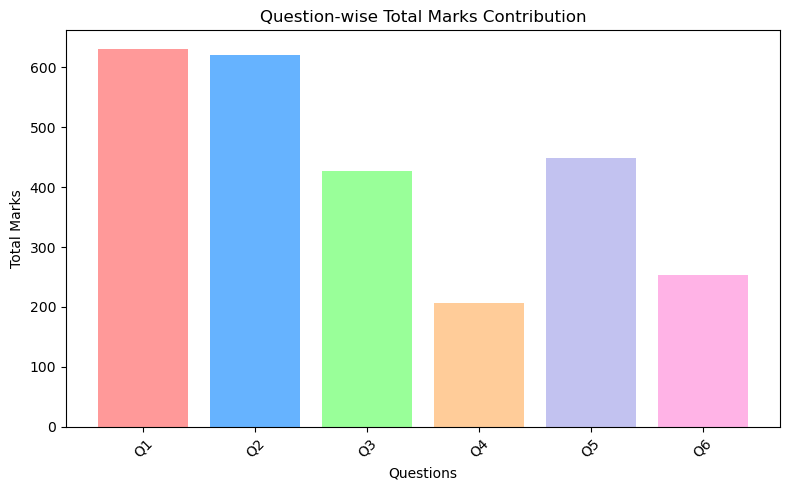

In [41]:
import matplotlib.pyplot as plt
question_totals = a[["Q1", "Q2", "Q3", "Q4", "Q5", "Q6"]].sum()
plt.figure(figsize=(8, 5))
plt.bar(question_totals.index, question_totals.values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.xlabel('Questions')
plt.ylabel('Total Marks')
plt.title('Question-wise Total Marks Contribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The bar chart provides a visual representation of the total marks contributed by each question (Q1 to Q6). By summing the marks for each question across all students, the chart shows which questions had the highest and lowest total contributions to the overall marks.

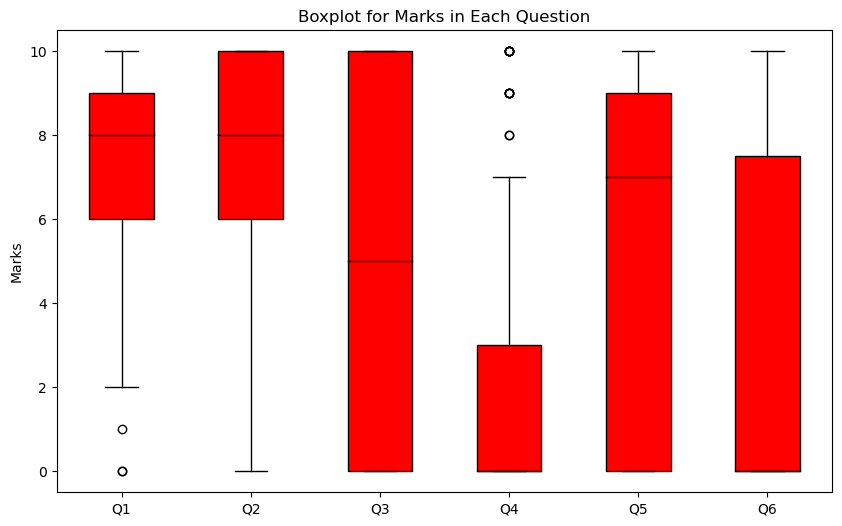

In [42]:
plt.figure(figsize=(10, 6))
a[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].boxplot(grid=False, patch_artist=True, 
                                                  boxprops=dict(facecolor='red', color='black'),
                                                  whiskerprops=dict(color='black'),
                                                  capprops=dict(color='black'),
                                                  medianprops=dict(color='black'))
plt.title('Boxplot for Marks in Each Question')
plt.ylabel('Marks')
plt.show()


The boxplot provides a detailed visualization of the distribution of marks for each question (Q1 to Q6) and highlights important statistics, such as the median, interquartile range (IQR), and potential outliers.

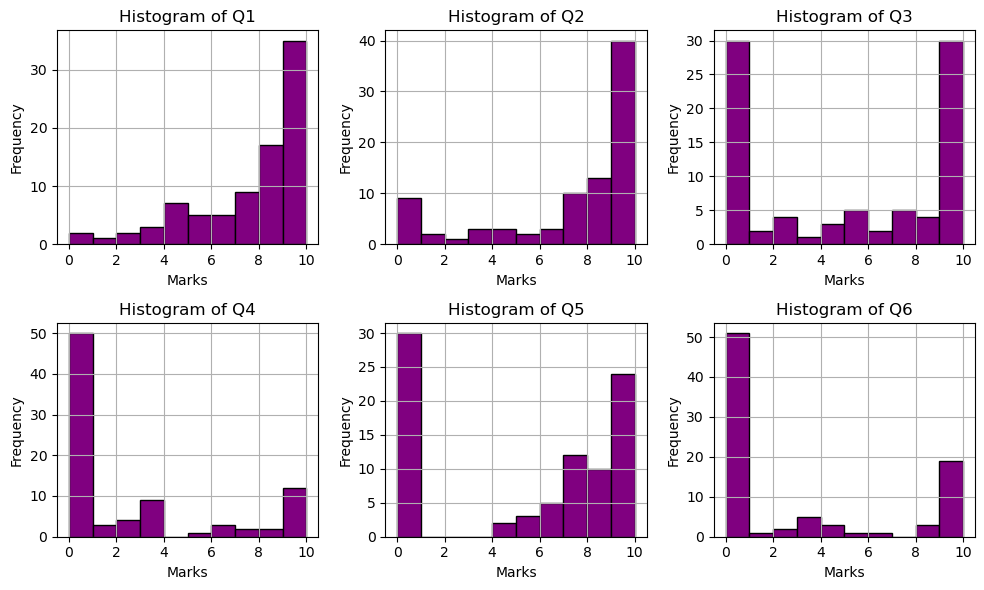

In [43]:
questions = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']
plt.figure(figsize=(10, 6))
for i, question in enumerate(questions, 1):
    plt.subplot(2, 3, i)
    plt.hist(a[question], bins=10, color='purple', edgecolor='black')
    plt.title(f'Histogram of {question}')
    plt.xlabel('Marks')
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

The set of histograms provides a detailed view of the distribution of marks for each individual question (Q1 to Q6). Each histogram displays how frequently students achieved particular mark ranges, offering insights into the difficulty and variability of each question

In [44]:
a=pd.read_csv("class_marks.csv",skiprows =[2,4,6])
a

,Total,Q1aM4,Q1bM6,Q2aM6,Q2bM4,Q3aM5,Q3bM5,Q4aM3,Q4bM7,Q5M10,Q6aM4,Q6bM6
0,37,4.0,5.0,6.0,4.0,2.0,1.0,NaN,5.0,8.0,4.0,6.0
1,33,4.0,5.0,5.0,1.0,5.0,5.0,NaN,NaN,8.0,NaN,NaN
2,36,3.0,6.0,4.0,4.0,5.0,4.0,NaN,NaN,10.0,NaN,NaN
3,25,3.0,4.0,NaN,2.0,5.0,5.0,NaN,NaN,6.0,NaN,NaN
4,34,4.0,6.0,6.0,4.0,NaN,NaN,2.0,NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
78,32,3.0,6.0,3.0,4.0,5.0,3.0,NaN,NaN,NaN,4.0,6.0
79,27,2.0,2.0,5.0,3.0,NaN,NaN,NaN,NaN,7.0,3.0,5.0
80,37,4.0,6.0,6.0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,6.0
81,28,4.0,NaN,5.0,4.0,5.0,4.0,NaN,NaN,6.0,NaN,NaN


This code used to remove the rows 2,4,6 and give the rest class marks of student

In [45]:
import pandas as pd
a=pd.read_csv("class_marks.csv")
a

,Total,Q1aM4,Q1bM6,Q2aM6,Q2bM4,Q3aM5,Q3bM5,Q4aM3,Q4bM7,Q5M10,Q6aM4,Q6bM6
0,37,4.0,5.0,6.0,4.0,2.0,1.0,NaN,5.0,8.0,4.0,6.0
1,32,4.0,3.0,4.0,3.0,NaN,NaN,3.0,6.0,9.0,NaN,NaN
2,33,4.0,5.0,5.0,1.0,5.0,5.0,NaN,NaN,8.0,NaN,NaN
3,24,4.0,6.0,6.0,3.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN
4,36,3.0,6.0,4.0,4.0,5.0,4.0,NaN,NaN,10.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
81,32,3.0,6.0,3.0,4.0,5.0,3.0,NaN,NaN,NaN,4.0,6.0
82,27,2.0,2.0,5.0,3.0,NaN,NaN,NaN,NaN,7.0,3.0,5.0
83,37,4.0,6.0,6.0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,6.0
84,28,4.0,NaN,5.0,4.0,5.0,4.0,NaN,NaN,6.0,NaN,NaN


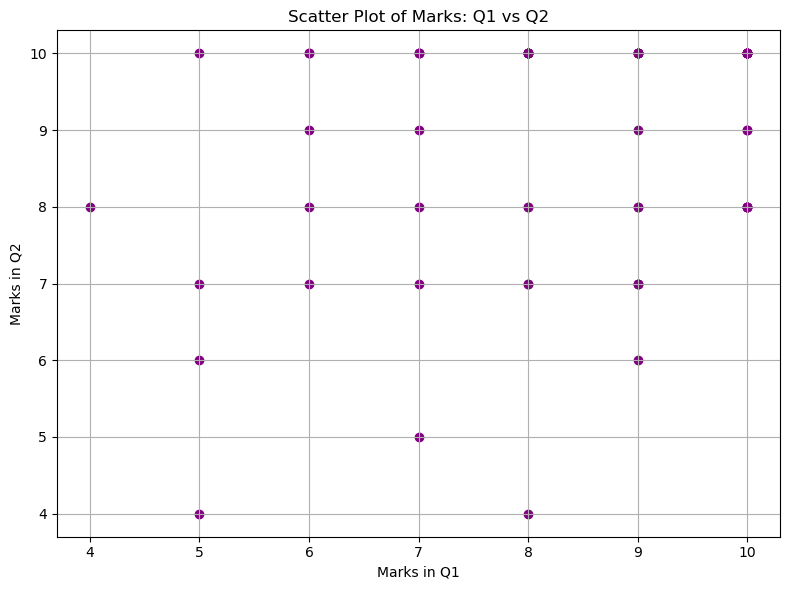

In [46]:
a["Q1"] = a["Q1aM4"] + a["Q1bM6"]
a["Q2"] = a["Q2aM6"] + a["Q2bM4"]
plt.figure(figsize=(8, 6))
plt.scatter(a['Q1'], a['Q2'], color='purple')
plt.title('Scatter Plot of Marks: Q1 vs Q2')
plt.xlabel('Marks in Q1')
plt.ylabel('Marks in Q2')
plt.grid(True)
plt.tight_layout()
plt.show()


The scatter plot generated between the marks of Q1 and Q2 provides a visual representation of the relationship between the two questions. Each point in the plot represents the marks obtained by a student in both Q1 and Q2. The x-axis shows the marks for Q1, while the y-axis represents the marks for Q2.

<Figure size 1000x600 with 0 Axes>

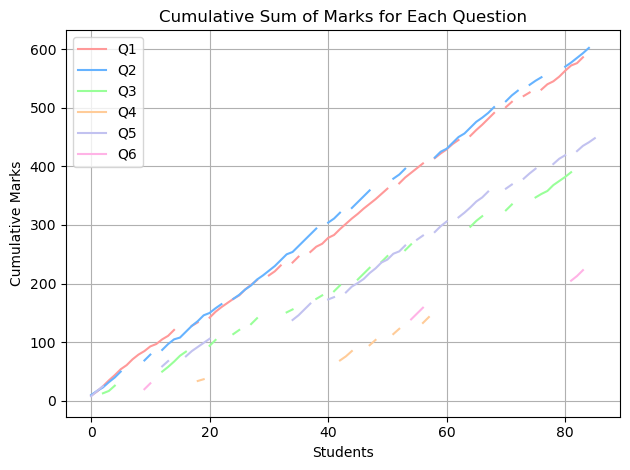

In [47]:
a["Q1"] = a["Q1aM4"] + a["Q1bM6"]
a["Q2"] = a["Q2aM6"] + a["Q2bM4"]
a["Q3"] = a["Q3aM5"] + a["Q3bM5"]
a["Q4"] = a["Q4aM3"] + a["Q4bM7"]
a["Q5"] = a["Q5M10"]
a["Q6"] = a["Q6aM4"] + a["Q6bM6"]
cumulative_sum = a[['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']].cumsum()
plt.figure(figsize=(10, 6))
cumulative_sum.plot(kind='line', color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6'])
plt.title('Cumulative Sum of Marks for Each Question')
plt.xlabel('Students')
plt.ylabel('Cumulative Marks')
plt.grid(True)
plt.tight_layout()
plt.show()


The line plot displaying the cumulative sum of marks for each question reveals how the total marks accumulate across students for each of the six questions. Each line represents one question (Q1 to Q6), with the x-axis representing the students and the y-axis showing the cumulative marks.

In [48]:
a['Result'] = a['Total'].apply(lambda x: 'pass' if x>=20 else 'Fail')
result_count=a['Result'].value_counts()
print("Pass and Fail Count:")
print(result_count)

Pass and Fail Count:
pass    78
Fail     8
Name: Result, dtype: int64


In [49]:
import numpy as np
import pandas as pd
conditions = [
    a['Total'] >= 90,     
    a['Total'] >= 75,     
    a['Total'] >= 60,     
    a['Total'] >= 50,    
    a['Total'] < 50      
]

grades = ['A', 'B', 'C', 'D', 'Fail']
a['Grade'] = np.select(conditions, grades)
print(a.head())


   Total  Q1aM4  Q1bM6  Q2aM6  Q2bM4  Q3aM5  Q3bM5  Q4aM3  Q4bM7  Q5M10  \
0     37    4.0    5.0    6.0    4.0    2.0    1.0    NaN    5.0    8.0   
1     32    4.0    3.0    4.0    3.0    NaN    NaN    3.0    6.0    9.0   
2     33    4.0    5.0    5.0    1.0    5.0    5.0    NaN    NaN    8.0   
3     24    4.0    6.0    6.0    3.0    2.0    2.0    NaN    NaN    NaN   
4     36    3.0    6.0    4.0    4.0    5.0    4.0    NaN    NaN   10.0   

   Q6aM4  Q6bM6    Q1    Q2    Q3   Q4    Q5    Q6 Result Grade  
0    4.0    6.0   9.0  10.0   3.0  NaN   8.0  10.0   pass  Fail  
1    NaN    NaN   7.0   7.0   NaN  9.0   9.0   NaN   pass  Fail  
2    NaN    NaN   9.0   6.0  10.0  NaN   8.0   NaN   pass  Fail  
3    2.0    NaN  10.0   9.0   4.0  NaN   NaN   NaN   pass  Fail  
4    NaN    NaN   9.0   8.0   9.0  NaN  10.0   NaN   pass  Fail  


A new column name grade is added 

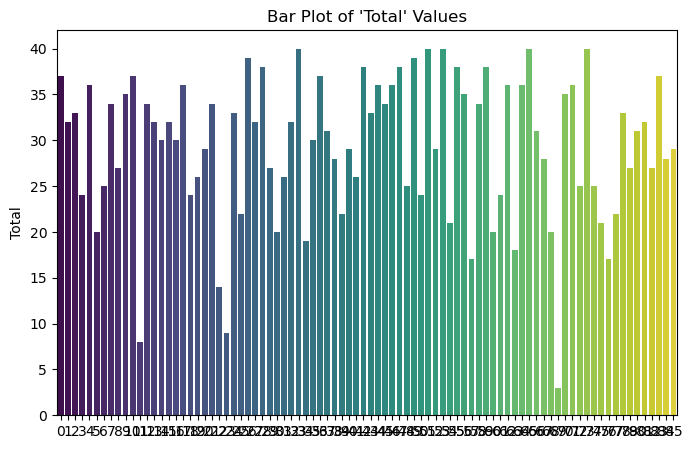

In [50]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x=a.index, y='Total', data=a, palette="viridis")
plt.title("Bar Plot of 'Total' Values")
plt.show()


In the bar plot of the 'Total' values, we observe a distribution of values across the dataset. Each bar represents a data point corresponding to a particular index (row) of the dataset, with the height of the bar indicating the value of the 'Total' column for that particular index.

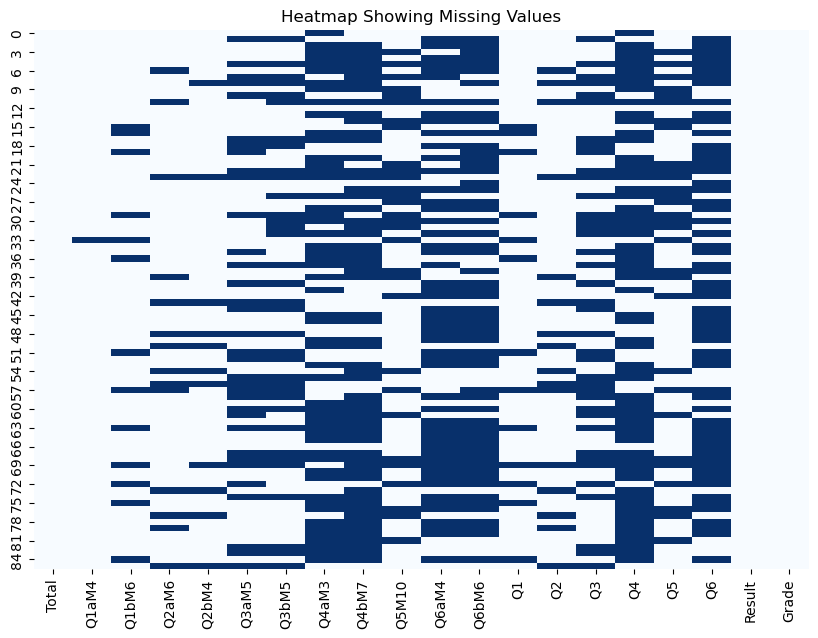

In [51]:
plt.figure(figsize=(10, 7))
sns.heatmap(a.isnull(), cbar=False, cmap="Blues")
plt.title("Heatmap Showing Missing Values")
plt.show()

The presence of missing values is visually indicated by a lighter color, as the heatmap uses a "Blues" color palette where darker shades represent non-missing values and lighter shades represent missing (NaN) values.

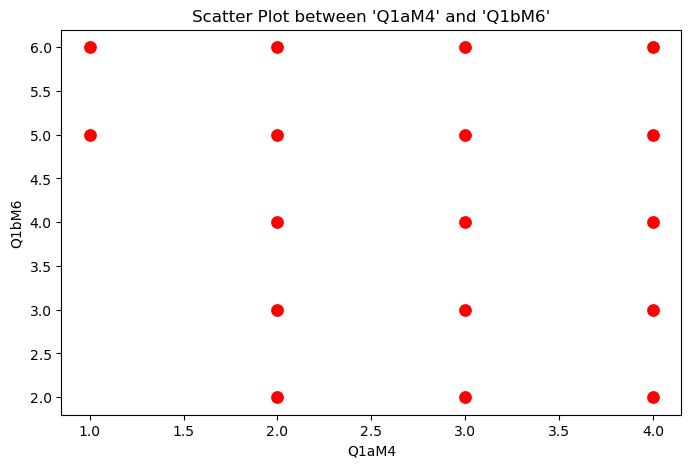

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Q1aM4', y='Q1bM6', data=a, s=100, color='red')
plt.title("Scatter Plot between 'Q1aM4' and 'Q1bM6'")
plt.show()

The scatter plot between the columns Q1aM4 and Q1bM6 helps visualize the relationship between these two variables. Each point on the scatter plot represents a data entry (a row from your dataset), where the value of Q1aM4 is plotted along the x-axis, and the value of Q1bM6 is plotted along the y-axis.

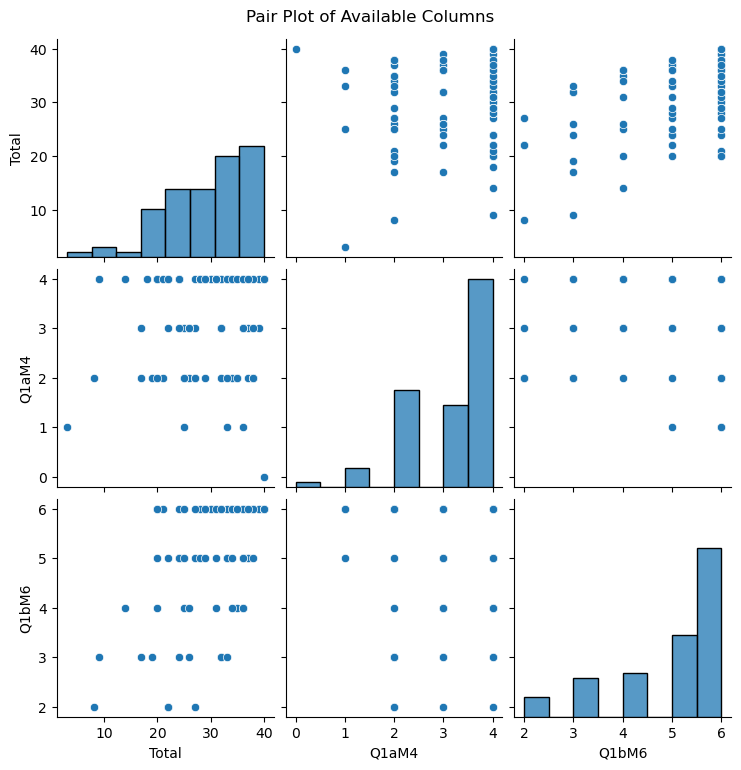

In [54]:
# Only use columns that exist in the DataFrame
sns.pairplot(a[['Total', 'Q1aM4', 'Q1bM6']])
plt.suptitle("Pair Plot of Available Columns", y=1.02)
plt.show()


The pair plot of the available columns 'Total', 'Q1aM4', and 'Q1bM6' displays the relationships between each pair of these columns. It generates a grid of scatter plots, with each plot showing the relationship between two variables. Diagonal plots show the distribution (histogram) of individual variables.

In [55]:
print(a.columns)

Index(['Total', 'Q1aM4', 'Q1bM6', 'Q2aM6', 'Q2bM4', 'Q3aM5', 'Q3bM5', 'Q4aM3',
       'Q4bM7', 'Q5M10', 'Q6aM4', 'Q6bM6', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
       'Result', 'Grade'],
      dtype='object')


In [56]:
import pandas as pd
def assign_grade(total):
    if total >= 40:
        return 'A'
    elif total >= 30:
        return 'B'
    elif total >= 20:
        return 'C'
    elif total >= 10:
        return 'D'
    else:
        return 'F'
a['Grade'] = a['Total'].apply(assign_grade)
a

,Total,Q1aM4,Q1bM6,Q2aM6,Q2bM4,Q3aM5,Q3bM5,Q4aM3,Q4bM7,Q5M10,Q6aM4,Q6bM6,Q1,Q2,Q3,Q4,Q5,Q6,Result,Grade
0,37,4.0,5.0,6.0,4.0,2.0,1.0,NaN,5.0,8.0,4.0,6.0,9.0,10.0,3.0,NaN,8.0,10.0,pass,B
1,32,4.0,3.0,4.0,3.0,NaN,NaN,3.0,6.0,9.0,NaN,NaN,7.0,7.0,NaN,9.0,9.0,NaN,pass,B
2,33,4.0,5.0,5.0,1.0,5.0,5.0,NaN,NaN,8.0,NaN,NaN,9.0,6.0,10.0,NaN,8.0,NaN,pass,B
3,24,4.0,6.0,6.0,3.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,10.0,9.0,4.0,NaN,NaN,NaN,pass,C
4,36,3.0,6.0,4.0,4.0,5.0,4.0,NaN,NaN,10.0,NaN,NaN,9.0,8.0,9.0,NaN,10.0,NaN,pass,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,32,3.0,6.0,3.0,4.0,5.0,3.0,NaN,NaN,NaN,4.0,6.0,9.0,7.0,8.0,NaN,NaN,10.0,pass,B
82,27,2.0,2.0,5.0,3.0,NaN,NaN,NaN,NaN,7.0,3.0,5.0,4.0,8.0,NaN,NaN,7.0,8.0,pass,C
83,37,4.0,6.0,6.0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,6.0,10.0,8.0,NaN,NaN,9.0,10.0,pass,B
84,28,4.0,NaN,5.0,4.0,5.0,4.0,NaN,NaN,6.0,NaN,NaN,NaN,9.0,9.0,NaN,6.0,NaN,pass,C


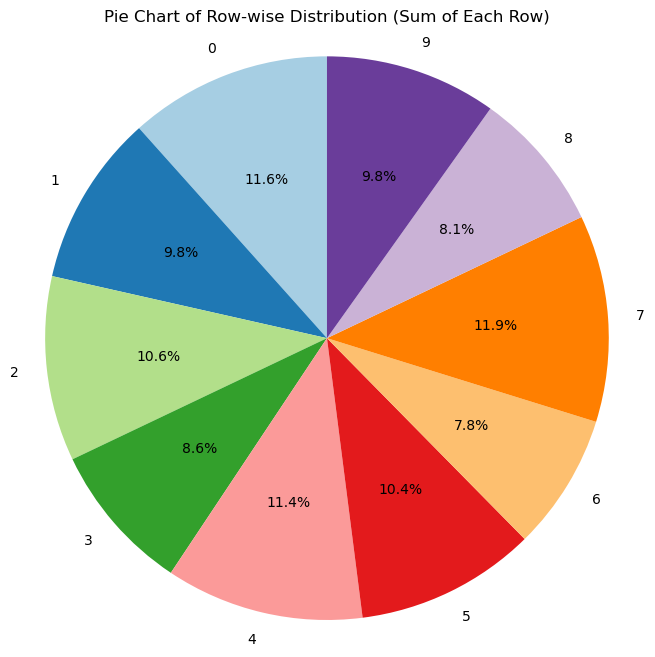

In [57]:

row_sums = df.sum(axis=1).dropna()
plt.figure(figsize=(8, 8))
plt.pie(row_sums, labels=row_sums.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Pie Chart of Row-wise Distribution (Sum of Each Row)")
plt.axis('equal')  
plt.show()


Conclusion:

    
In conclusion, the dataset provides a structured view of individual performance across multiple questions or modules in a test or assessment. It includes total scores and individual question/module scores, with some missing values indicating that certain questions were either not attempted or data was not recorded. The scores vary across individuals, reflecting different levels of understanding or performance in specific areas. This dataset can be useful for identifying trends, evaluating overall performance, and highlighting areas where improvement may be needed. Analyzing patterns in the data could help in refining teaching methods or adjusting assessment strategies to enhance overall learning outcomes.